In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import ipaddress
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dasgroup/rba-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.10G/1.10G [00:17<00:00, 66.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dasgroup/rba-dataset/versions/1


In [3]:
import os
csv_file_path = os.path.join(path, 'rba-dataset.csv') # Replace 'data.csv' with the correct filename
print(csv_file_path)
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(csv_file_path,nrows=1000000)
data.head()

/root/.cache/kagglehub/datasets/dasgroup/rba-dataset/versions/1/rba-dataset.csv


index          Login Timestamp              User ID  Round-Trip Time [ms]  \
0      0  2020-02-03 12:43:30.772 -4324475583306591935                   NaN   
1      1  2020-02-03 12:43:43.549 -4324475583306591935                   NaN   
2      2  2020-02-03 12:43:55.873 -3284137479262433373                   NaN   
3      3  2020-02-03 12:43:56.180 -4324475583306591935                   NaN   
4      4  2020-02-03 12:43:59.396 -4618854071942621186                   NaN   

      IP Address Country    Region       City     ASN  \
0    10.0.65.171      NO         -          -   29695   
1   194.87.207.6      AU         -          -   60117   
2  81.167.144.58      NO  Vestland  Urangsvag   29695   
3  170.39.78.152      US         -          -  393398   
4      10.0.0.47      US  Virginia    Ashburn  398986   

                                   User Agent String  \
0  Mozilla/5.0  (iPhone; CPU iPhone OS 13_4 like ...   
1  Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
2  Mozilla/5.0  (iPad; CPU OS 7_1 like Mac OS X) ...   
3  Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
4  Mozilla/5.0  (Linux; U; Android 2.2) Build/NMA...   

          Browser Name and Version OS Name and Version Device Type  \
0              Firefox 20.0.0.1618            iOS 13.4      mobile   
1          Chrome Mobile 46.0.2490         Android 4.1      mobile   
2               Android 2.3.3.2672             iOS 7.1      mobile   
3  Chrome Mobile WebView 85.0.4183         Android 4.1      mobile   
4  Chrome Mobile WebView 85.0.4183         Android 2.2      mobile   

   Login Successful  Is Attack IP  Is Account Takeover  
0             False         False                False  
1             False         False                False  
2              True         False                False  
3             False         False                False  
4             False          True                False

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import ipaddress
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns

In [5]:
data.head()

index          Login Timestamp              User ID  Round-Trip Time [ms]  \
0      0  2020-02-03 12:43:30.772 -4324475583306591935                   NaN   
1      1  2020-02-03 12:43:43.549 -4324475583306591935                   NaN   
2      2  2020-02-03 12:43:55.873 -3284137479262433373                   NaN   
3      3  2020-02-03 12:43:56.180 -4324475583306591935                   NaN   
4      4  2020-02-03 12:43:59.396 -4618854071942621186                   NaN   

      IP Address Country    Region       City     ASN  \
0    10.0.65.171      NO         -          -   29695   
1   194.87.207.6      AU         -          -   60117   
2  81.167.144.58      NO  Vestland  Urangsvag   29695   
3  170.39.78.152      US         -          -  393398   
4      10.0.0.47      US  Virginia    Ashburn  398986   

                                   User Agent String  \
0  Mozilla/5.0  (iPhone; CPU iPhone OS 13_4 like ...   
1  Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
2  Mozilla/5.0  (iPad; CPU OS 7_1 like Mac OS X) ...   
3  Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
4  Mozilla/5.0  (Linux; U; Android 2.2) Build/NMA...   

          Browser Name and Version OS Name and Version Device Type  \
0              Firefox 20.0.0.1618            iOS 13.4      mobile   
1          Chrome Mobile 46.0.2490         Android 4.1      mobile   
2               Android 2.3.3.2672             iOS 7.1      mobile   
3  Chrome Mobile WebView 85.0.4183         Android 4.1      mobile   
4  Chrome Mobile WebView 85.0.4183         Android 2.2      mobile   

   Login Successful  Is Attack IP  Is Account Takeover  
0             False         False                False  
1             False         False                False  
2              True         False                False  
3             False         False                False  
4             False          True                False

In [6]:
len(data)

1000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   index                     1000000 non-null  int64  
 1   Login Timestamp           1000000 non-null  object 
 2   User ID                   1000000 non-null  int64  
 3   Round-Trip Time [ms]      44035 non-null    float64
 4   IP Address                1000000 non-null  object 
 5   Country                   1000000 non-null  object 
 6   Region                    999479 non-null   object 
 7   City                      999651 non-null   object 
 8   ASN                       1000000 non-null  int64  
 9   User Agent String         1000000 non-null  object 
 10  Browser Name and Version  1000000 non-null  object 
 11  OS Name and Version       1000000 non-null  object 
 12  Device Type               999943 non-null   object 
 13  Login Successful          10

In [8]:
data.isna().sum()

index                            0
Login Timestamp                  0
User ID                          0
Round-Trip Time [ms]        955965
IP Address                       0
Country                          0
Region                         521
City                           349
ASN                              0
User Agent String                0
Browser Name and Version         0
OS Name and Version              0
Device Type                     57
Login Successful                 0
Is Attack IP                     0
Is Account Takeover              0
dtype: int64

In [9]:
data['Login Hour'] = pd.to_datetime(data['Login Timestamp']).dt.hour

In [10]:
data['Is Account Takeover'] = data['Is Account Takeover'].astype(np.uint8)
data['Is Attack IP'] = data['Is Attack IP'].astype(np.uint8)
data['Login Successful'] = data['Login Successful'].astype(np.uint8)

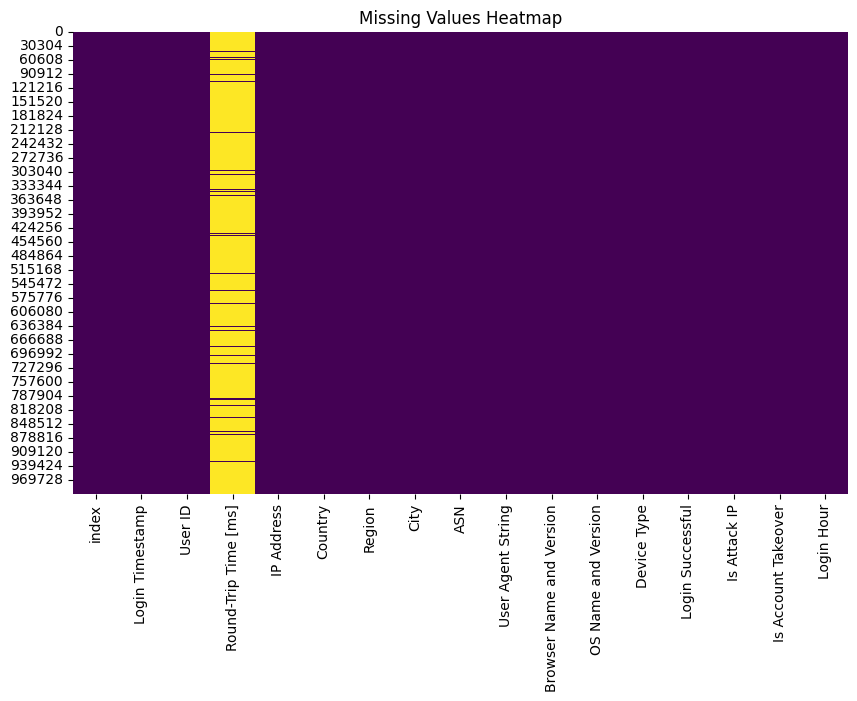

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
data = data.drop(columns=["Round-Trip Time [ms]", 'Region', 'City', 'Login Timestamp', 'index'])

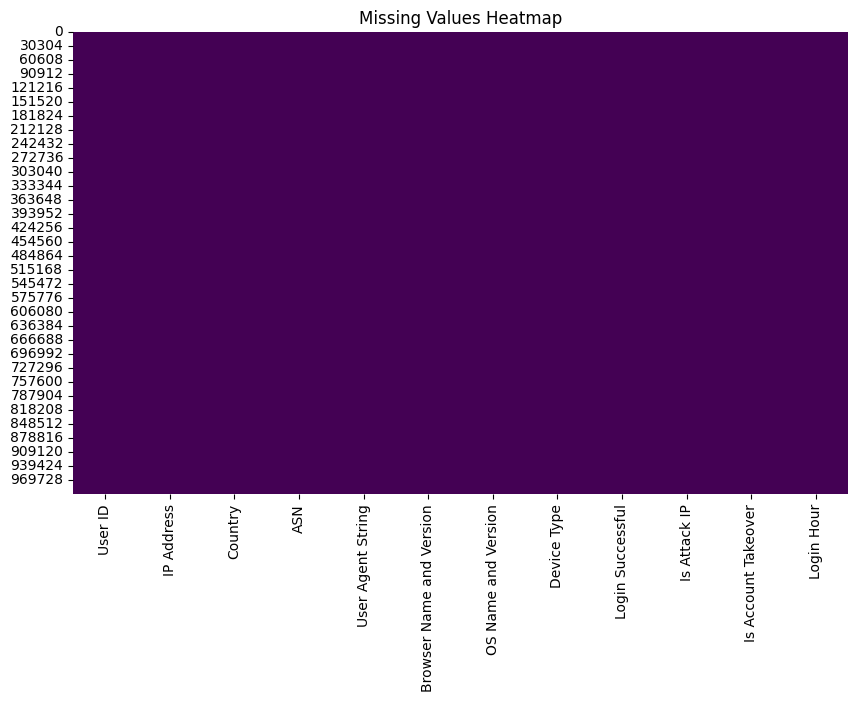

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [14]:
data.head()

User ID     IP Address Country     ASN  \
0 -4324475583306591935    10.0.65.171      NO   29695   
1 -4324475583306591935   194.87.207.6      AU   60117   
2 -3284137479262433373  81.167.144.58      NO   29695   
3 -4324475583306591935  170.39.78.152      US  393398   
4 -4618854071942621186      10.0.0.47      US  398986   

                                   User Agent String  \
0  Mozilla/5.0  (iPhone; CPU iPhone OS 13_4 like ...   
1  Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
2  Mozilla/5.0  (iPad; CPU OS 7_1 like Mac OS X) ...   
3  Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus...   
4  Mozilla/5.0  (Linux; U; Android 2.2) Build/NMA...   

          Browser Name and Version OS Name and Version Device Type  \
0              Firefox 20.0.0.1618            iOS 13.4      mobile   
1          Chrome Mobile 46.0.2490         Android 4.1      mobile   
2               Android 2.3.3.2672             iOS 7.1      mobile   
3  Chrome Mobile WebView 85.0.4183         Android 4.1      mobile   
4  Chrome Mobile WebView 85.0.4183         Android 2.2      mobile   

   Login Successful  Is Attack IP  Is Account Takeover  Login Hour  
0                 0             0                    0          12  
1                 0             0                    0          12  
2                 1             0                    0          12  
3                 0             0                    0          12  
4                 0             1                    0          12

In [15]:
data['User Agent String'], _ = pd.factorize(data['User Agent String'])
data['Browser Name and Version'], _ = pd.factorize(data['Browser Name and Version'])
data['OS Name and Version'], _ = pd.factorize(data['OS Name and Version'])

In [16]:
def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

data['IP Address'] = data['IP Address'].apply(ip_to_int)

In [17]:
data.head(20)

User ID  IP Address Country     ASN  User Agent String  \
0  -4324475583306591935   167788971      NO   29695                  0   
1  -4324475583306591935  3260534534      AU   60117                  1   
2  -3284137479262433373  1369935930      NO   29695                  2   
3  -4324475583306591935  2854702744      US  393398                  3   
4  -4618854071942621186   167772207      US  398986                  4   
5  -4324475583306591935  3521936254      US  393398                  5   
6   7246533443898239661  1355474134      NO   15659                  6   
7  -3243978724802435038  2854702769      US  393398                  7   
8   8076000552587369902   167787988      NO   29695                  8   
9  -3065936140549856249  1558015394      NO   29695                  9   
10  5932501938287412564  1412447623      NO   15659                 10   
11 -9080829243863829585  2620665939      NO   29695                 11   
12  5729679535281970107  2854703012      US  393398                 12   
13 -4324475583306591935   785658794      NO   41164                 13   
14 -4324475583306591935   167789398      NO   29695                  2   
15 -8296667206273764769  1385380445      NO   29492                  2   
16 -4663943525943860871  1369861544      NO   29695                 10   
17 -4324475583306591935  1933957922      ID   38778                 14   
18 -4324475583306591935   783790079      NO  197475                 15   
19  1211299018980019605   167792079      NO   29695                 16   

    Browser Name and Version  OS Name and Version Device Type  \
0                          0                    0      mobile   
1                          1                    1      mobile   
2                          2                    2      mobile   
3                          3                    1      mobile   
4                          3                    3      mobile   
5                          3                    1      mobile   
6                          4                    4     desktop   
7                          5                    5      mobile   
8                          6                    6      mobile   
9                          7                    7     desktop   
10                         8                    7     desktop   
11                         9                    7     desktop   
12                        10                    1      mobile   
13                        11                    8     desktop   
14                         2                    2      mobile   
15                         2                    2      mobile   
16                         8                    7     desktop   
17                         3                    0      mobile   
18                        12                    9     desktop   
19                         4                   10     desktop   

    Login Successful  Is Attack IP  Is Account Takeover  Login Hour  
0                  0             0                    0          12  
1                  0             0                    0          12  
2                  1             0                    0          12  
3                  0             0                    0          12  
4                  0             1                    0          12  
5                  0             1                    0          12  
6                  1             0                    0          12  
7                  0             0                    0          12  
8                  0             0                    0          12  
9                  1             0                    0          12  
10                 1             0                    0          12  
11                 1             0                    0          12  
12                 0             0                    0          12  
13                 0             0                    0          12  
14                 0             0           

In [18]:
account_takeover_rows = data[data['Is Account Takeover'] == 1]

# Display or further process the filtered rows
account_takeover_rows

User ID  IP Address Country     ASN  User Agent String  \
82873   5519106287451092780   168034722      IT  503109               2611   
82947  -7654599524478640403   168034722      IT  503109               2611   
100085 -6380256063165146454   528683032      RO   56851              10118   
202905  4130074439166519892  3114960900      IT  206801                 36   
273968  -136955930917892295   167793933      NO  197475                 11   
482034 -5783801028078876142    37266954      RO    3280               2611   
482102  6969491805167028251    37266954      RO    3280               2611   
482456 -2200491188712463133    37266954      RO    3280               2611   
482566  5780471454460598558    37266954      RO    3280               2611   
483111 -4181075837585773799  1542515947      RO   62350               2611   
483360   866176531291139058  1542515947      RO   62350               2611   

        Browser Name and Version  OS Name and Version Device Type  \
82873                         36                    7     desktop   
82947                         36                    7     desktop   
100085                       180                   10     desktop   
202905                        24                   18      mobile   
273968                         9                    7     desktop   
482034                        36                    7     desktop   
482102                        36                    7     desktop   
482456                        36                    7     desktop   
482566                        36                    7     desktop   
483111                        36                    7     desktop   
483360                        36                    7     desktop   

        Login Successful  Is Attack IP  Is Account Takeover  Login Hour  
82873                  1             0                    1          13  
82947                  1             0                    1          13  
100085                 1             1                    1          17  
202905                 1             0                    1           5  
273968                 1             0                    1           1  
482034                 1             1                    1           5  
482102                 1             1                    1           5  
482456                 1             1                    1           6  
482566                 1             1                    1           6  
483111                 1             1                    1           6  
483360                 1             1                    1           6

In [19]:
account_takeover_rows = data[data['Is Account Takeover'] == 0]

# Display or further process the filtered rows
account_takeover_rows

User ID  IP Address Country     ASN  User Agent String  \
0      -4324475583306591935   167788971      NO   29695                  0   
1      -4324475583306591935  3260534534      AU   60117                  1   
2      -3284137479262433373  1369935930      NO   29695                  2   
3      -4324475583306591935  2854702744      US  393398                  3   
4      -4618854071942621186   167772207      US  398986                  4   
...                     ...         ...     ...     ...                ...   
999995  1405702337411348829  3105060399      PL   49528                 21   
999996  1016555876890694630  2854702444      US  393398               9771   
999997 -6877594850683127519  2556257185      NO   29695              34774   
999998  4791060705011626227   167844152      NO   34989                201   
999999 -4324475583306591935  2457381199      UA   43309              44018   

        Browser Name and Version  OS Name and Version Device Type  \
0                              0                    0      mobile   
1                              1                    1      mobile   
2                              2                    2      mobile   
3                              3                    1      mobile   
4                              3                    3      mobile   
...                          ...                  ...         ...   
999995                         4                    7     desktop   
999996                       255                   22      mobile   
999997                       193                   16      mobile   
999998                         0                   16      mobile   
999999                        49                   11      mobile   

        Login Successful  Is Attack IP  Is Account Takeover  Login Hour  
0                      0             0                    0          12  
1                      0             0                    0          12  
2                      1             0                    0          12  
3                      0             0                    0          12  
4                      0             1                    0          12  
...                  ...           ...                  ...         ...  
999995                 1             0                    0          16  
999996                 1             0                    0          16  
999997                 1             0                    0          16  
999998                 1             0                    0          16  
999999                 0             0                    0          16  

[999989 rows x 12 columns]

In [20]:
categorical_cols = ['Country', 'Device Type']
numeric_cols = ['ASN', 'Login Hour', 'IP Address', 'User Agent String', 'Browser Name and Version', 'OS Name and Version']

In [21]:
# Splitting the dataset
features = data.drop(['Is Attack IP', 'Is Account Takeover'], axis=1)
labels = data['Is Account Takeover']

In [22]:
for col in ['Country', 'Device Type', 'OS Name and Version']:
    data[col] = data[col].astype('category').cat.codes

Top 10 countries with the highest login success rate:
     Country  Failure Rate (%)  Success Rate (%)
73        73          0.000000        100.000000
167      167          0.000000        100.000000
178      178          0.000000        100.000000
21        21          0.000000        100.000000
15        15         16.666667         83.333333
166      166         26.086957         73.913043
134      134         35.215701         64.784299
194      194         37.500000         62.500000
129      129         39.285714         60.714286
171      171         40.000000         60.000000


<ipython-input-23-3b7a7d23b65d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Success Rate (%)", data=top_10_countries, palette="magma")
<ipython-input-23-3b7a7d23b65d>:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


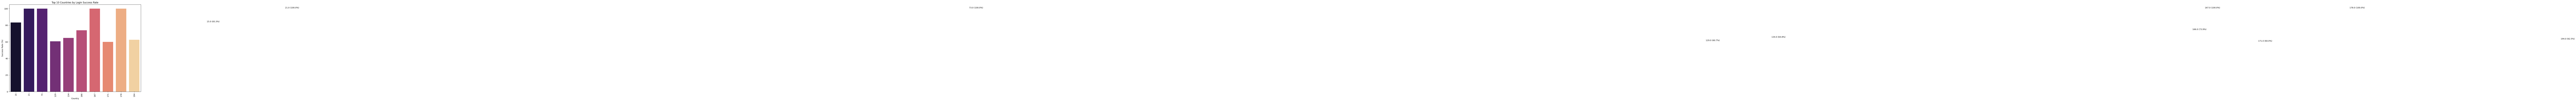

In [23]:
# Assuming `data` is your DataFrame with the relevant columns
country_success = data.groupby(['Country', 'Login Successful']).size().unstack(fill_value=0)

# Calculate the success rate for each country
country_success_rate = (country_success.div(country_success.sum(axis=1), axis=0) * 100).reset_index()
country_success_rate.columns = ['Country', 'Failure Rate (%)', 'Success Rate (%)']

# Sort by success rate and select the top 10 countries
top_10_countries = country_success_rate.sort_values('Success Rate (%)', ascending=False).head(10)

# Display the top 10 countries with the highest login success rate
print("Top 10 countries with the highest login success rate:")
print(top_10_countries)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="Country", y="Success Rate (%)", data=top_10_countries, palette="magma")

# Add value labels
for index, row in top_10_countries.iterrows():
    plt.text(index, row["Success Rate (%)"] + 0.5, f"{row['Country']} ({row['Success Rate (%)']:.1f}%)",
             ha='center', color='black', fontsize=10)

plt.title("Top 10 Countries by Login Success Rate")
plt.xticks(rotation=90)
plt.ylabel("Success Rate (%)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

<ipython-input-24-25c97d86357a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=login_success_counts.index, y=login_success_counts.values, palette="viridis")


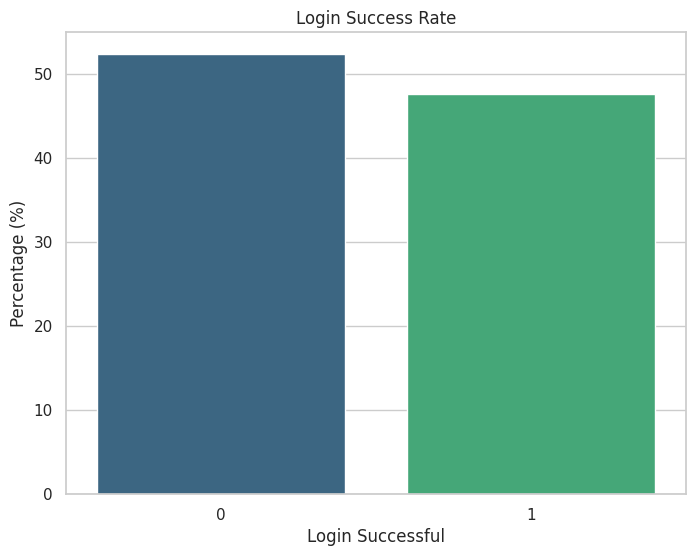

In [24]:
sns.set(style="whitegrid")

# 1. Login Success Rates Analysis
# ------------------------------
login_success_counts = data['Login Successful'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=login_success_counts.index, y=login_success_counts.values, palette="viridis")
plt.title("Login Success Rate")
plt.ylabel("Percentage (%)")
plt.xlabel("Login Successful")
plt.show()

<ipython-input-59-5b1965bdf100>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y=True, data=country_success_rate.sort_values(True, ascending=False), palette="magma")


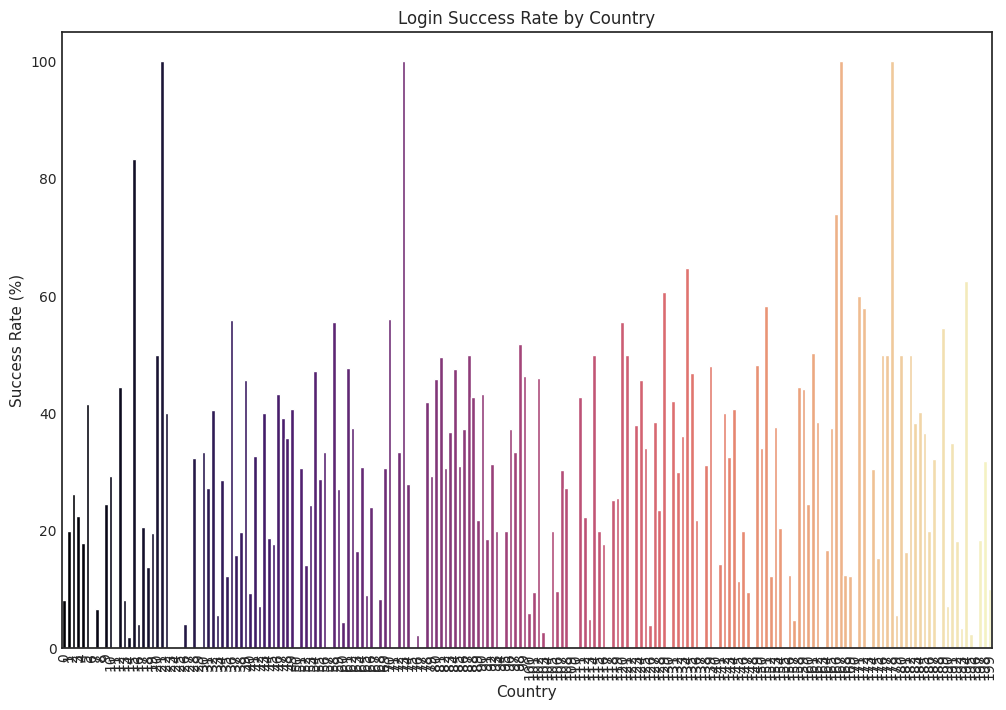

In [59]:
# 2. Geolocation Analysis (Country-wise Login Success Rate)
# ---------------------------------------------------------
country_success = data.groupby(['Country', 'Login Successful']).size().unstack(fill_value=0)
country_success_rate = (country_success.div(country_success.sum(axis=1), axis=0) * 100).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x="Country", y=True, data=country_success_rate.sort_values(True, ascending=False), palette="magma")
plt.title("Login Success Rate by Country")
plt.xticks(rotation=90)
plt.ylabel("Success Rate (%)")
plt.xlabel("Country")
plt.show()



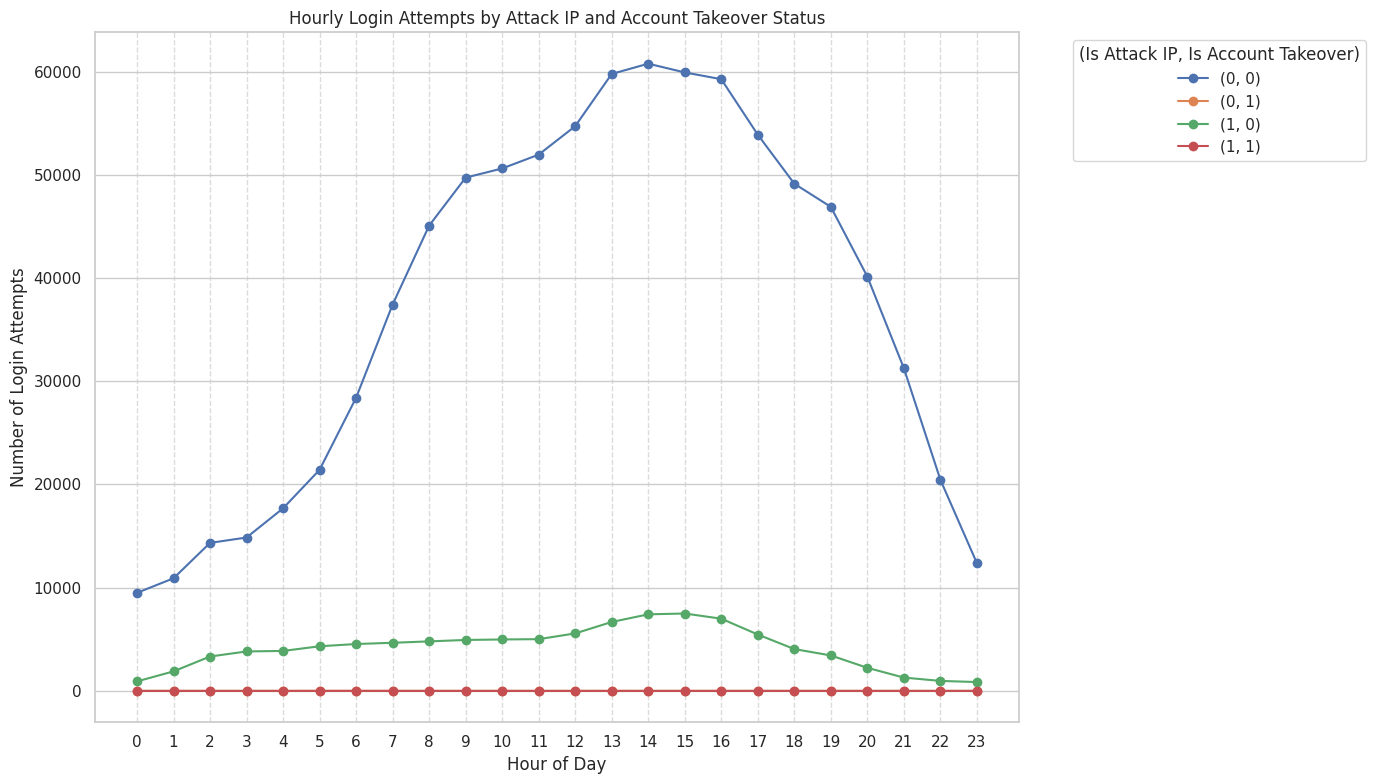

In [26]:

# Group by hour, 'Is Attack IP', and 'Is Account Takeover' and count occurrences
hourly_login_trend = data.groupby(['Login Hour', 'Is Attack IP', 'Is Account Takeover']).size().reset_index(name='Count')

# Pivot data to get separate columns for each combination of 'Is Attack IP' and 'Is Account Takeover'
hourly_login_pivot = hourly_login_trend.pivot_table(index='Login Hour', columns=['Is Attack IP', 'Is Account Takeover'], values='Count', fill_value=0)

# Plot the trend
plt.figure(figsize=(14, 8))
hourly_login_pivot.plot(ax=plt.gca(), linestyle='-', marker='o')
plt.title("Hourly Login Attempts by Attack IP and Account Takeover Status")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Login Attempts")
plt.legend(title="(Is Attack IP, Is Account Takeover)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 24))  # Ensures all hours are shown
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-27-19851e4a97db>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_type_counts.index, y=device_type_counts.values, palette="coolwarm")


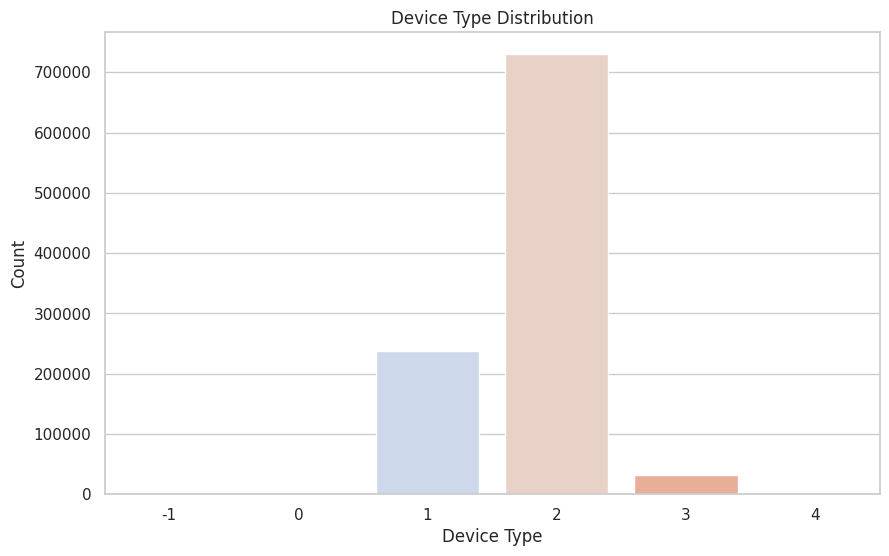

In [27]:
# 3. User Agent and Device Type Analysis
# --------------------------------------
device_type_counts = data['Device Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=device_type_counts.index, y=device_type_counts.values, palette="coolwarm")
plt.title("Device Type Distribution")
plt.ylabel("Count")
plt.xlabel("Device Type")
plt.show()

<ipython-input-28-6da4426e3698>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is Attack IP', data=data, ax=axes[0], palette="Set2")
<ipython-input-28-6da4426e3698>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is Account Takeover', data=data, ax=axes[1], palette="Set3")


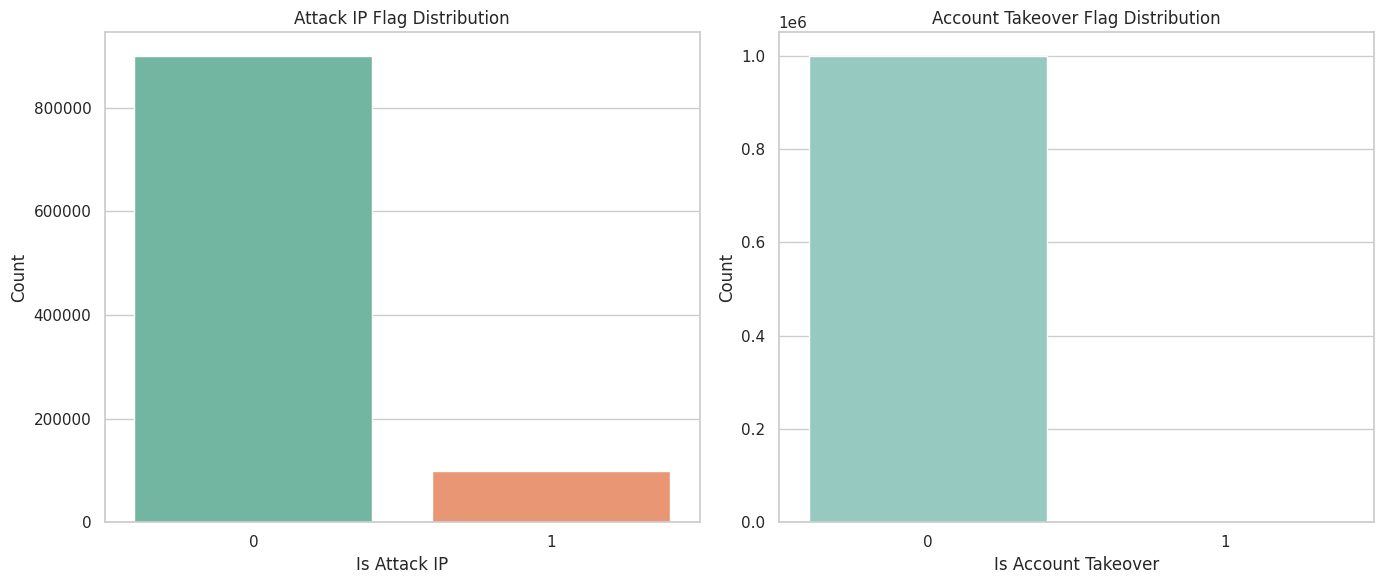

In [28]:
# 4. Login Anomalies Analysis - Synthetic Label Adjustment
# --------------------------------------------------------
# Check distribution of 'Is Attack IP' and 'Is Account Takeover'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Is Attack IP', data=data, ax=axes[0], palette="Set2")
axes[0].set_title("Attack IP Flag Distribution")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Is Attack IP")

sns.countplot(x='Is Account Takeover', data=data, ax=axes[1], palette="Set3")
axes[1].set_title("Account Takeover Flag Distribution")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Is Account Takeover")

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

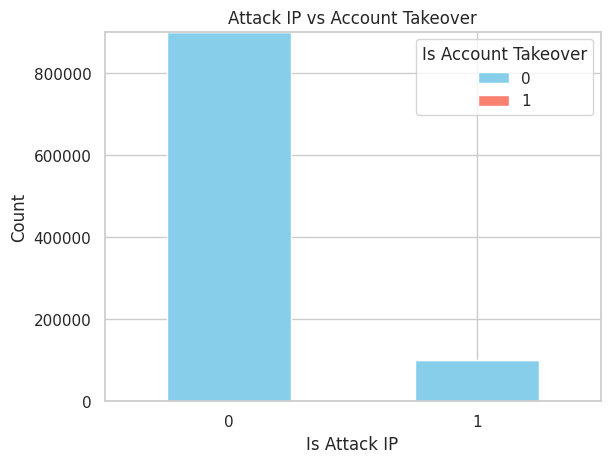

In [29]:
attack_takeover_counts = data.groupby(['Is Attack IP', 'Is Account Takeover']).size().unstack(fill_value=0)

# Option 1: Grouped Bar Chart
plt.figure(figsize=(10, 6))
attack_takeover_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title("Attack IP vs Account Takeover")
plt.xlabel("Is Attack IP")
plt.ylabel("Count")
plt.legend(title="Is Account Takeover", loc="upper right")
plt.xticks(rotation=0)
plt.show()

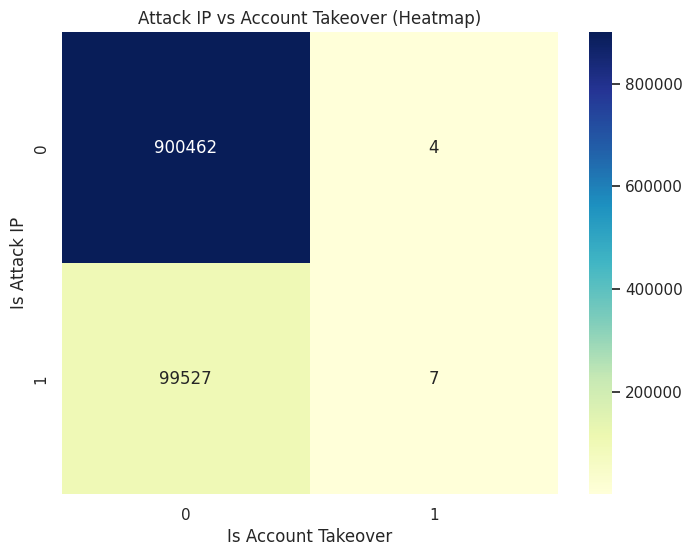

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(attack_takeover_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Attack IP vs Account Takeover (Heatmap)")
plt.xlabel("Is Account Takeover")
plt.ylabel("Is Attack IP")
plt.show()

<ipython-input-31-8eb8470d7f91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Device Type', data=data, palette='viridis')


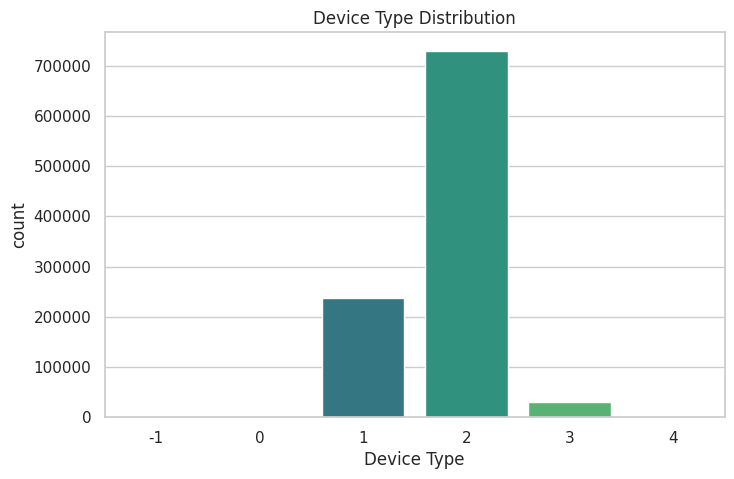

In [31]:
# Device Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Device Type', data=data, palette='viridis')
plt.title('Device Type Distribution')
plt.show()

<ipython-input-32-025f7ccc8336>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='OS Name and Version', data=data, palette='viridis')


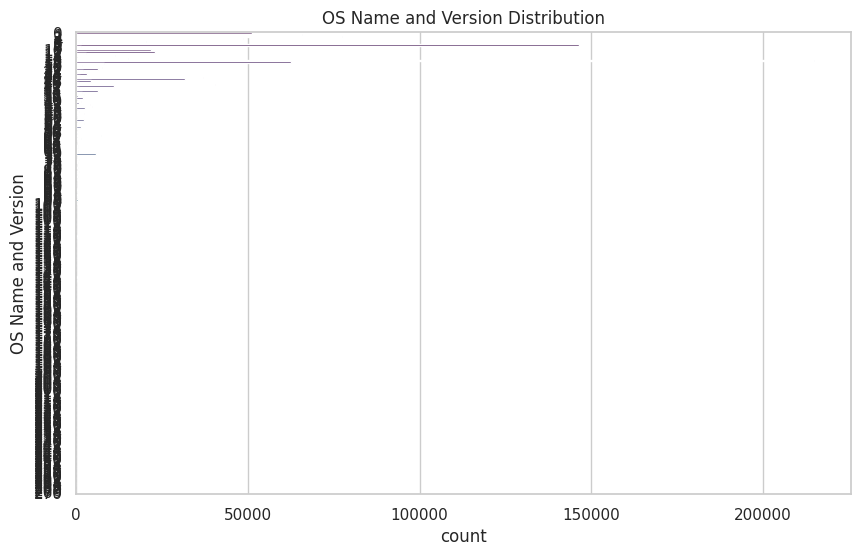

In [32]:
# OS Name and Version Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='OS Name and Version', data=data, palette='viridis')
plt.title('OS Name and Version Distribution')
plt.show()

<ipython-input-33-e2784628954c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Login Successful', data=data, palette='coolwarm')


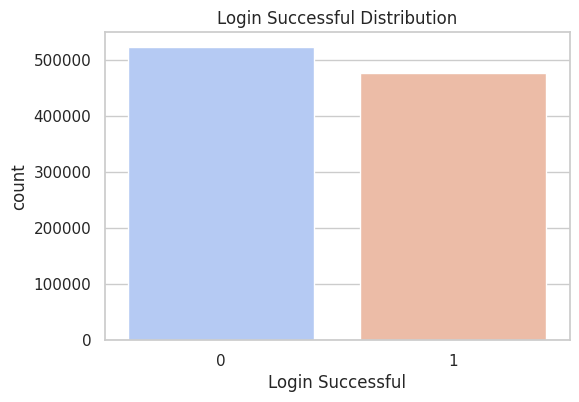

In [33]:
# Login Successful Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Login Successful', data=data, palette='coolwarm')
plt.title('Login Successful Distribution')
plt.show()

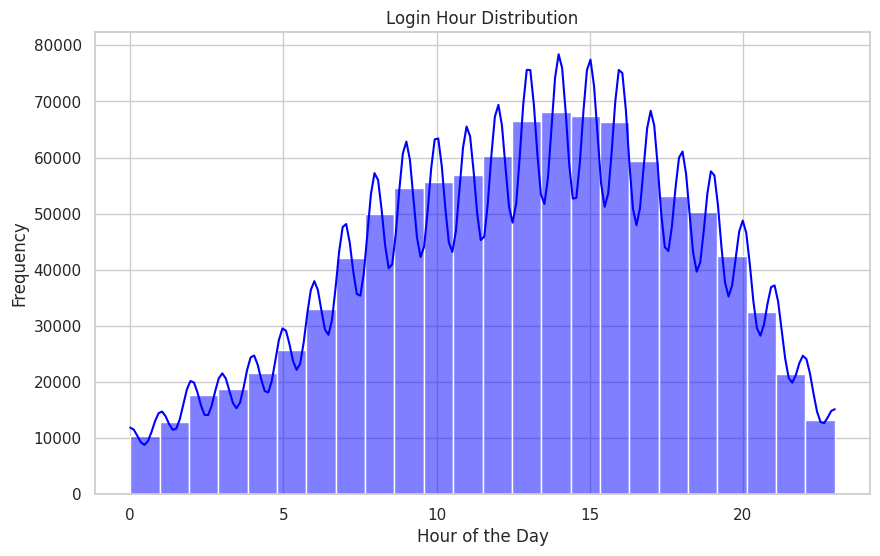

In [34]:
#Login Hour Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Login Hour'], bins=24, kde=True, color='blue')
plt.title('Login Hour Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

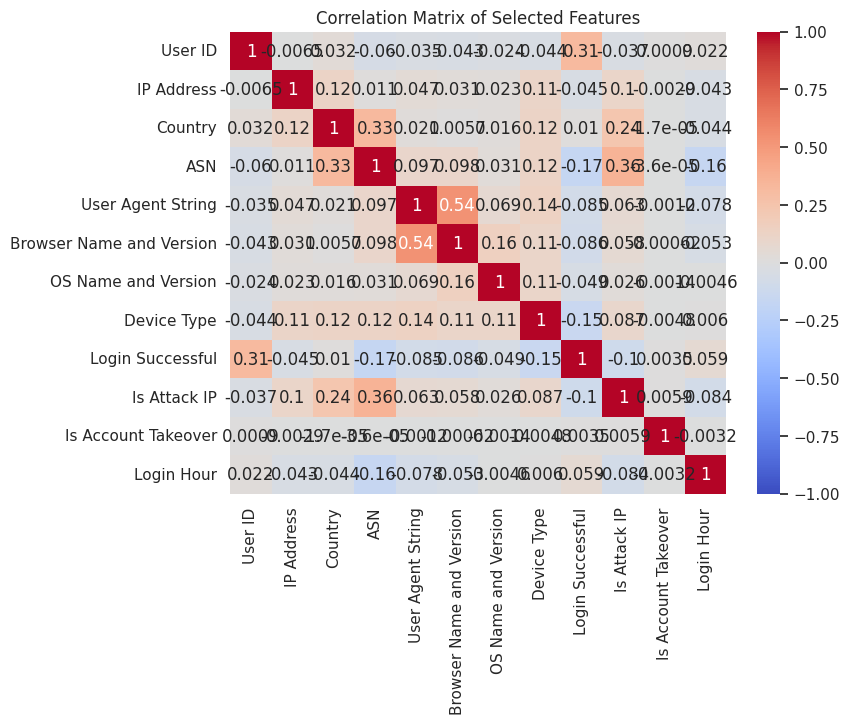

In [35]:
#Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Features")
plt.show()

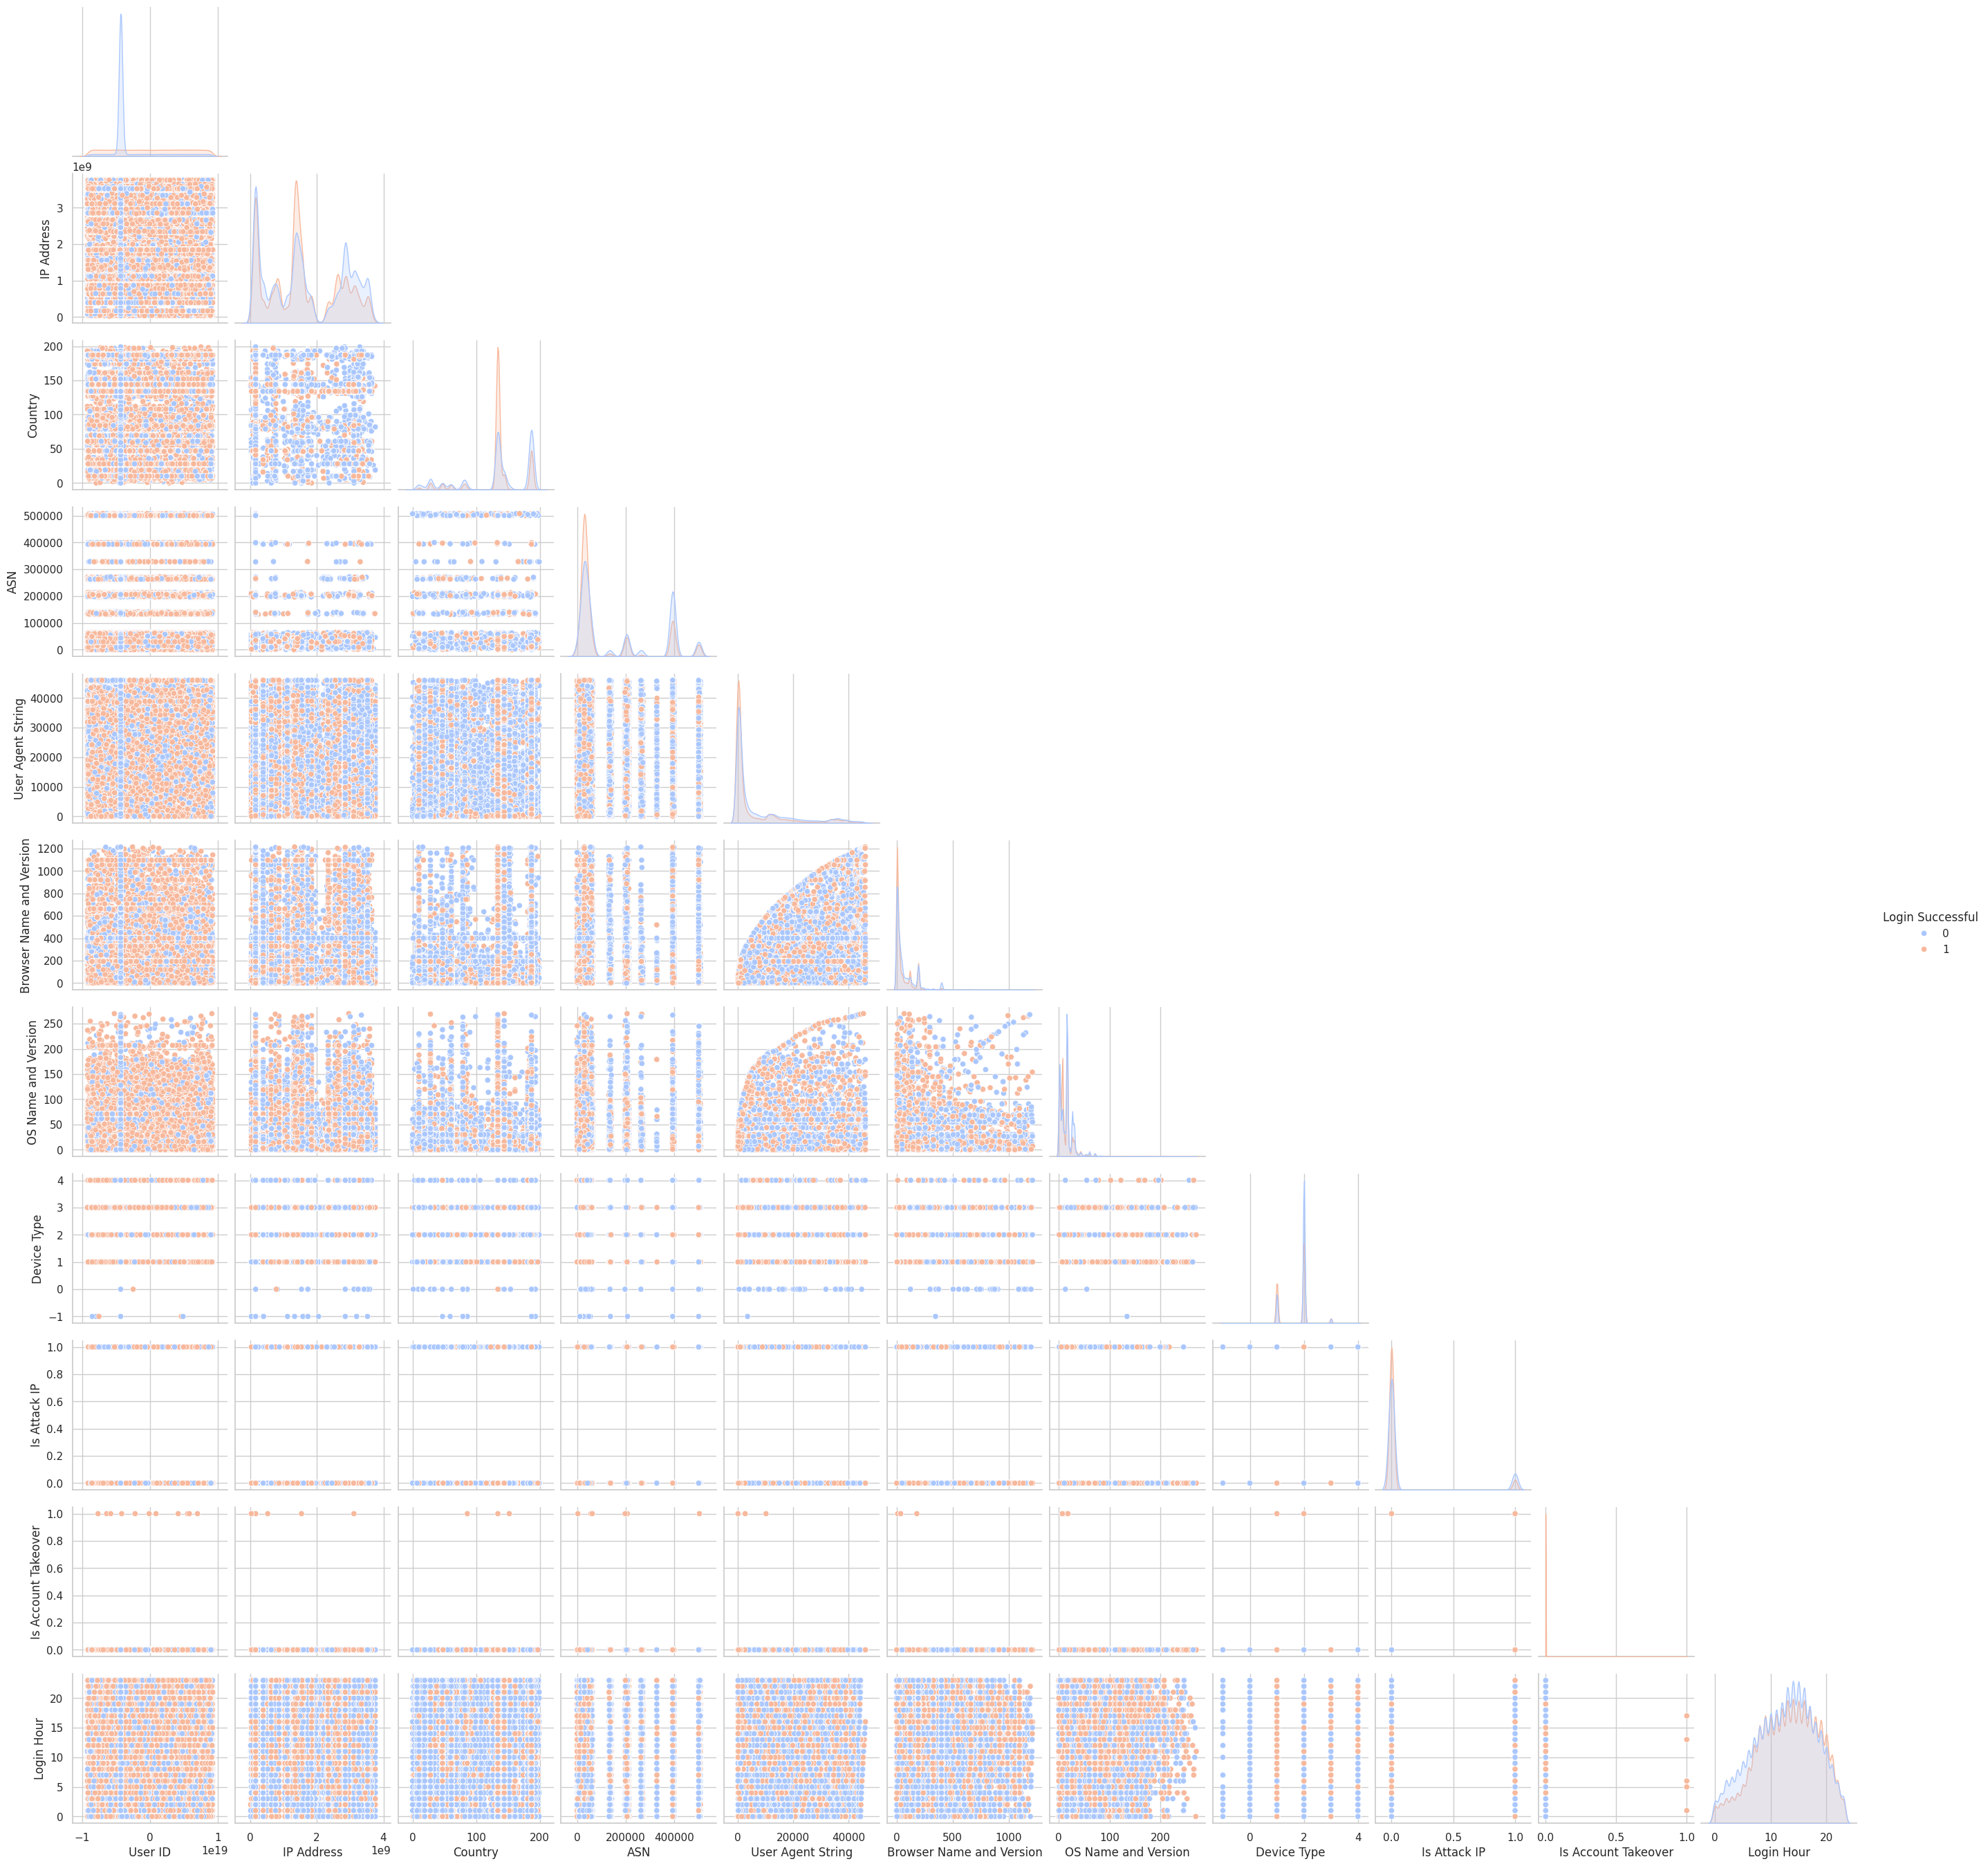

In [36]:
#Pairwise relationships (Optional: Useful for further insights)
sns.pairplot(data, hue="Login Successful", palette="coolwarm", corner=True)
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) # Setting handle_unknown='ignore'
    ])

# Classifiers
classifiers = {
    'logistic_regression': LogisticRegression(max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'svm': SVC(probability=True),
    'random_forest': RandomForestClassifier(),
    'Adaboost' : AdaBoostClassifier(),
    'Extra' :  ExtraTreesClassifier(),
    'lgbm' : LGBMClassifier(),
    'XGB': XGBClassifier()
}

# A function to choose classifiers
def make_pipeline(classifier_key):
    if classifier_key in classifiers:
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifiers[classifier_key])
        ])
        return clf
    else:
        raise ValueError(f"Classifier {classifier_key} is not defined")

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
classifier_key = 'logistic_regression'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
lrpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

AUC Score: 0.8122106221062211


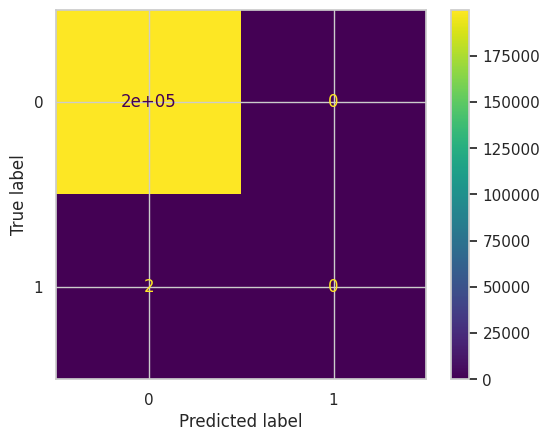

In [42]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

In [43]:
classifier_key = 'decision_tree'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
dtpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

AUC Score: 0.5


In [44]:
classifier_key = 'random_forest'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
predictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

AUC Score: 0.49985249852498526


In [45]:
classifier_key = 'Adaboost'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
abpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AUC Score: 0.3916689166891669


In [46]:
classifier_key = 'lgbm'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
lgbmpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

[LightGBM] [Info] Number of positive: 9, number of negative: 799991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 135
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000011 -> initscore=-11.395131
[LightGBM] [Info] Start training from score -11.395131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [47]:
classifier_key = 'XGB'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
xgbpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

AUC Score: 0.9344530945309453


In [48]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=61371e828633e373aa21ea4705cd1931cdb800611fbcdf5faf8c2f8756a0024b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [49]:
X_train.head()

User ID  IP Address Country     ASN  User Agent String  \
291465 -2135340835512144756   633310862      NO   57963                 21   
531977 -4324475583306591935  2854703041      US  393398              29886   
650566  4262635604721397478  3277382513      US  398986              33749   
709299  5222713364570081691  3340391488      US  393398                140   
884883  5195597749006429501  1123610105      US  393398              42127   

        Browser Name and Version  OS Name and Version Device Type  \
291465                         4                    7     desktop   
531977                       321                   12      mobile   
650566                       156                    1      mobile   
709299                         0                   16      mobile   
884883                       193                   21      mobile   

        Login Successful  Login Hour  
291465                 1           9  
531977                 0          16  
650566                 0           2  
709299                 1          17  
884883                 1           4

In [50]:
X_test.head()

User ID  IP Address Country     ASN  User Agent String  \
348549  3462038275990900439  2854703005      US  393398                203   
59232  -4324475583306591935  3137367324      BR   22689               7193   
793663 -4324475583306591935   167961289      UA   56347              38766   
853450 -4324475583306591935  3521936867      US  393398              40248   
10981  -8379219866110316416  3584227504      NO   28824                  2   

        Browser Name and Version  OS Name and Version Device Type  \
348549                        84                    1      mobile   
59232                        492                    2      mobile   
793663                       505                   16      mobile   
853450                       124                   12      mobile   
10981                          2                    2      mobile   

        Login Successful  Login Hour  
348549                 0           4  
59232                  0           8  
793663                 0          19  
853450                 0          15  
10981                  1          14


Feature Importance Analysis

High Risk Features:
--------------------------------------------------------------------------------
Feature                                            Importance (%)  Cumulative (%) 
--------------------------------------------------------------------------------
ASN                                                         21.01%          21.01%
Country_RO                                                  19.52%          40.53%

Total High Risk Features: 2
Total Contribution: 40.53%

Medium Risk Features:
--------------------------------------------------------------------------------
Feature                                            Importance (%)  Cumulative (%) 
--------------------------------------------------------------------------------
Login Hour                                                  12.22%          52.75%
Device Type_desktop                                         10.98%          63.73%
Browser Name and Version                         

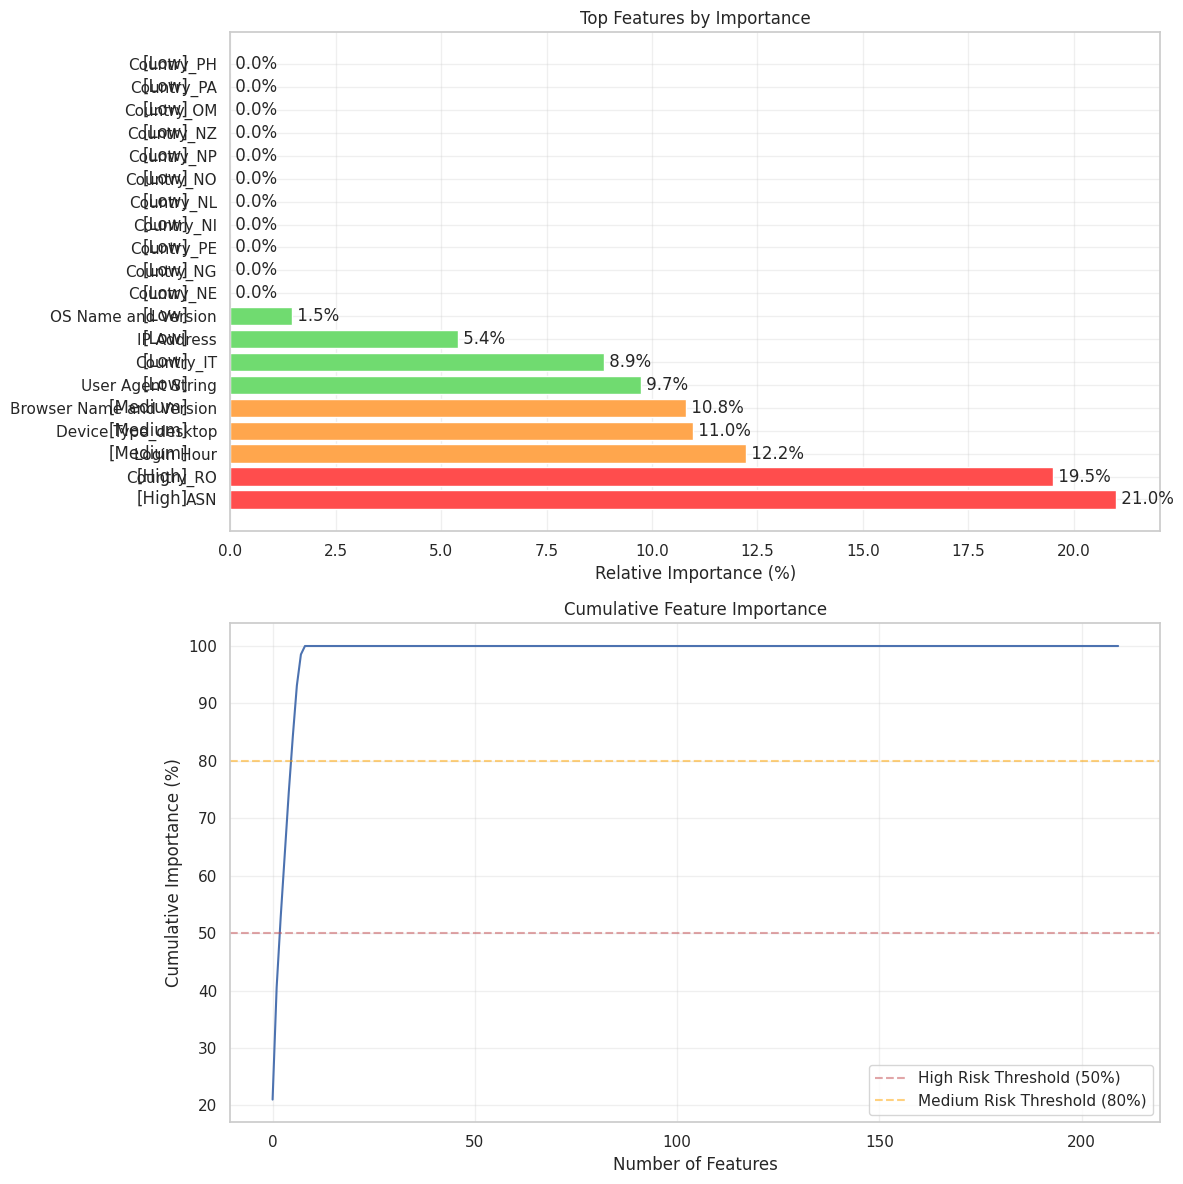

In [51]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse

def analyze_feature_importance(pipeline, X_train, categorical_cols, numeric_cols):
    """
    Analyze feature importance for an already trained pipeline with XGBoost
    """
    # Transform the data using the preprocessor
    preprocessed_data = pipeline.named_steps['preprocessor'].transform(X_train)

    # Get feature names
    all_features = []

    # Get numeric feature names (they stay the same)
    all_features.extend(numeric_cols)

    # Get categorical feature names after one-hot encoding
    onehot_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
    categorical_features = onehot_encoder.get_feature_names_out(categorical_cols)
    all_features.extend(categorical_features)

    # Get XGBoost model from pipeline
    xgb_model = pipeline.named_steps['classifier']

    # Get feature importances directly from XGBoost
    importances = xgb_model.feature_importances_

    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': importances
    })
     # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Calculate normalized importance and cumulative importance
    importance_df['Importance_Normalized'] = (importance_df['Importance'] /
                                            importance_df['Importance'].sum() * 100)
    importance_df['Cumulative_Importance'] = importance_df['Importance_Normalized'].cumsum()

    # Assign risk categories using numpy where instead of loc
    conditions = [
        importance_df['Cumulative_Importance'] <= 50,
        (importance_df['Cumulative_Importance'] > 50) & (importance_df['Cumulative_Importance'] <= 80)
    ]
    choices = ['High', 'Medium']
    importance_df['Risk_Category'] = np.select(conditions, choices, default='Low')

    return importance_df

def plot_feature_importance(importance_df, top_n=20):
    """
    Create visualizations for feature importance
    """
    # Set style without using seaborn style
    plt.rcParams['figure.figsize'] = (12, 12)
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3

    fig, (ax1, ax2) = plt.subplots(2, 1)

    # Color mapping for risk categories
    colors = {'High': '#ff4d4d', 'Medium': '#ffa64d', 'Low': '#70db70'}

    # Plot 1: Top N features importance bar plot
    top_df = importance_df.head(top_n)

    # Create color list for bars
    bar_colors = [colors[cat] for cat in top_df['Risk_Category']]

    # Create bar plot with explicit colors
    bars = ax1.barh(range(len(top_df)),
                    top_df['Importance_Normalized'],
                    color=bar_colors)

    # Set y-tick labels
    ax1.set_yticks(range(len(top_df)))
    ax1.set_yticklabels(top_df['Feature'])

    # Add percentage labels and risk categories
    for i, row in enumerate(top_df.itertuples()):
        ax1.text(row.Importance_Normalized, i, f' {row.Importance_Normalized:.1f}%',
                va='center')
        ax1.text(-1, i, f'[{row.Risk_Category}]', va='center', ha='right')

    ax1.set_title('Top Features by Importance')
    ax1.set_xlabel('Relative Importance (%)')

    # Plot 2: Cumulative importance plot
    ax2.plot(range(len(importance_df)), importance_df['Cumulative_Importance'])

    # Add threshold lines
    ax2.axhline(y=50, color='r', linestyle='--', alpha=0.5,
                label='High Risk Threshold (50%)')
    ax2.axhline(y=80, color='orange', linestyle='--', alpha=0.5,
                label='Medium Risk Threshold (80%)')

    ax2.set_title('Cumulative Feature Importance')
    ax2.set_xlabel('Number of Features')
    ax2.set_ylabel('Cumulative Importance (%)')
    ax2.legend()

    plt.tight_layout()
    return fig

def print_risk_summary(importance_df):
    """
    Print a detailed summary of features by risk category
    """
    print("\nFeature Importance Analysis")
    print("=" * 80)

    for category in ['High', 'Medium', 'Low']:
        category_df = importance_df[importance_df['Risk_Category'] == category]

        print(f"\n{category} Risk Features:")
        print("-" * 80)
        print(f"{'Feature':<50} {'Importance (%)':<15} {'Cumulative (%)':<15}")
        print("-" * 80)

        for _, row in category_df.iterrows():
            print(f"{row['Feature']:<50} {row['Importance_Normalized']:>14.2f}% "
                  f"{row['Cumulative_Importance']:>14.2f}%")

        category_importance = category_df['Importance_Normalized'].sum()
        print(f"\nTotal {category} Risk Features: {len(category_df)}")
        print(f"Total Contribution: {category_importance:.2f}%")
        print("=" * 80)

# Example usage:
try:
    # Create and display analysis
    importance_df = analyze_feature_importance(pipeline, X_train, categorical_cols, numeric_cols)
    fig = plot_feature_importance(importance_df)
    print_risk_summary(importance_df)

    # Optionally save results
    importance_df.to_csv('xgboost_feature_importance.csv', index=False)

except Exception as e:
    import traceback
    print(f"Error: {str(e)}")
    print("\nFull traceback:")
    print(traceback.format_exc())

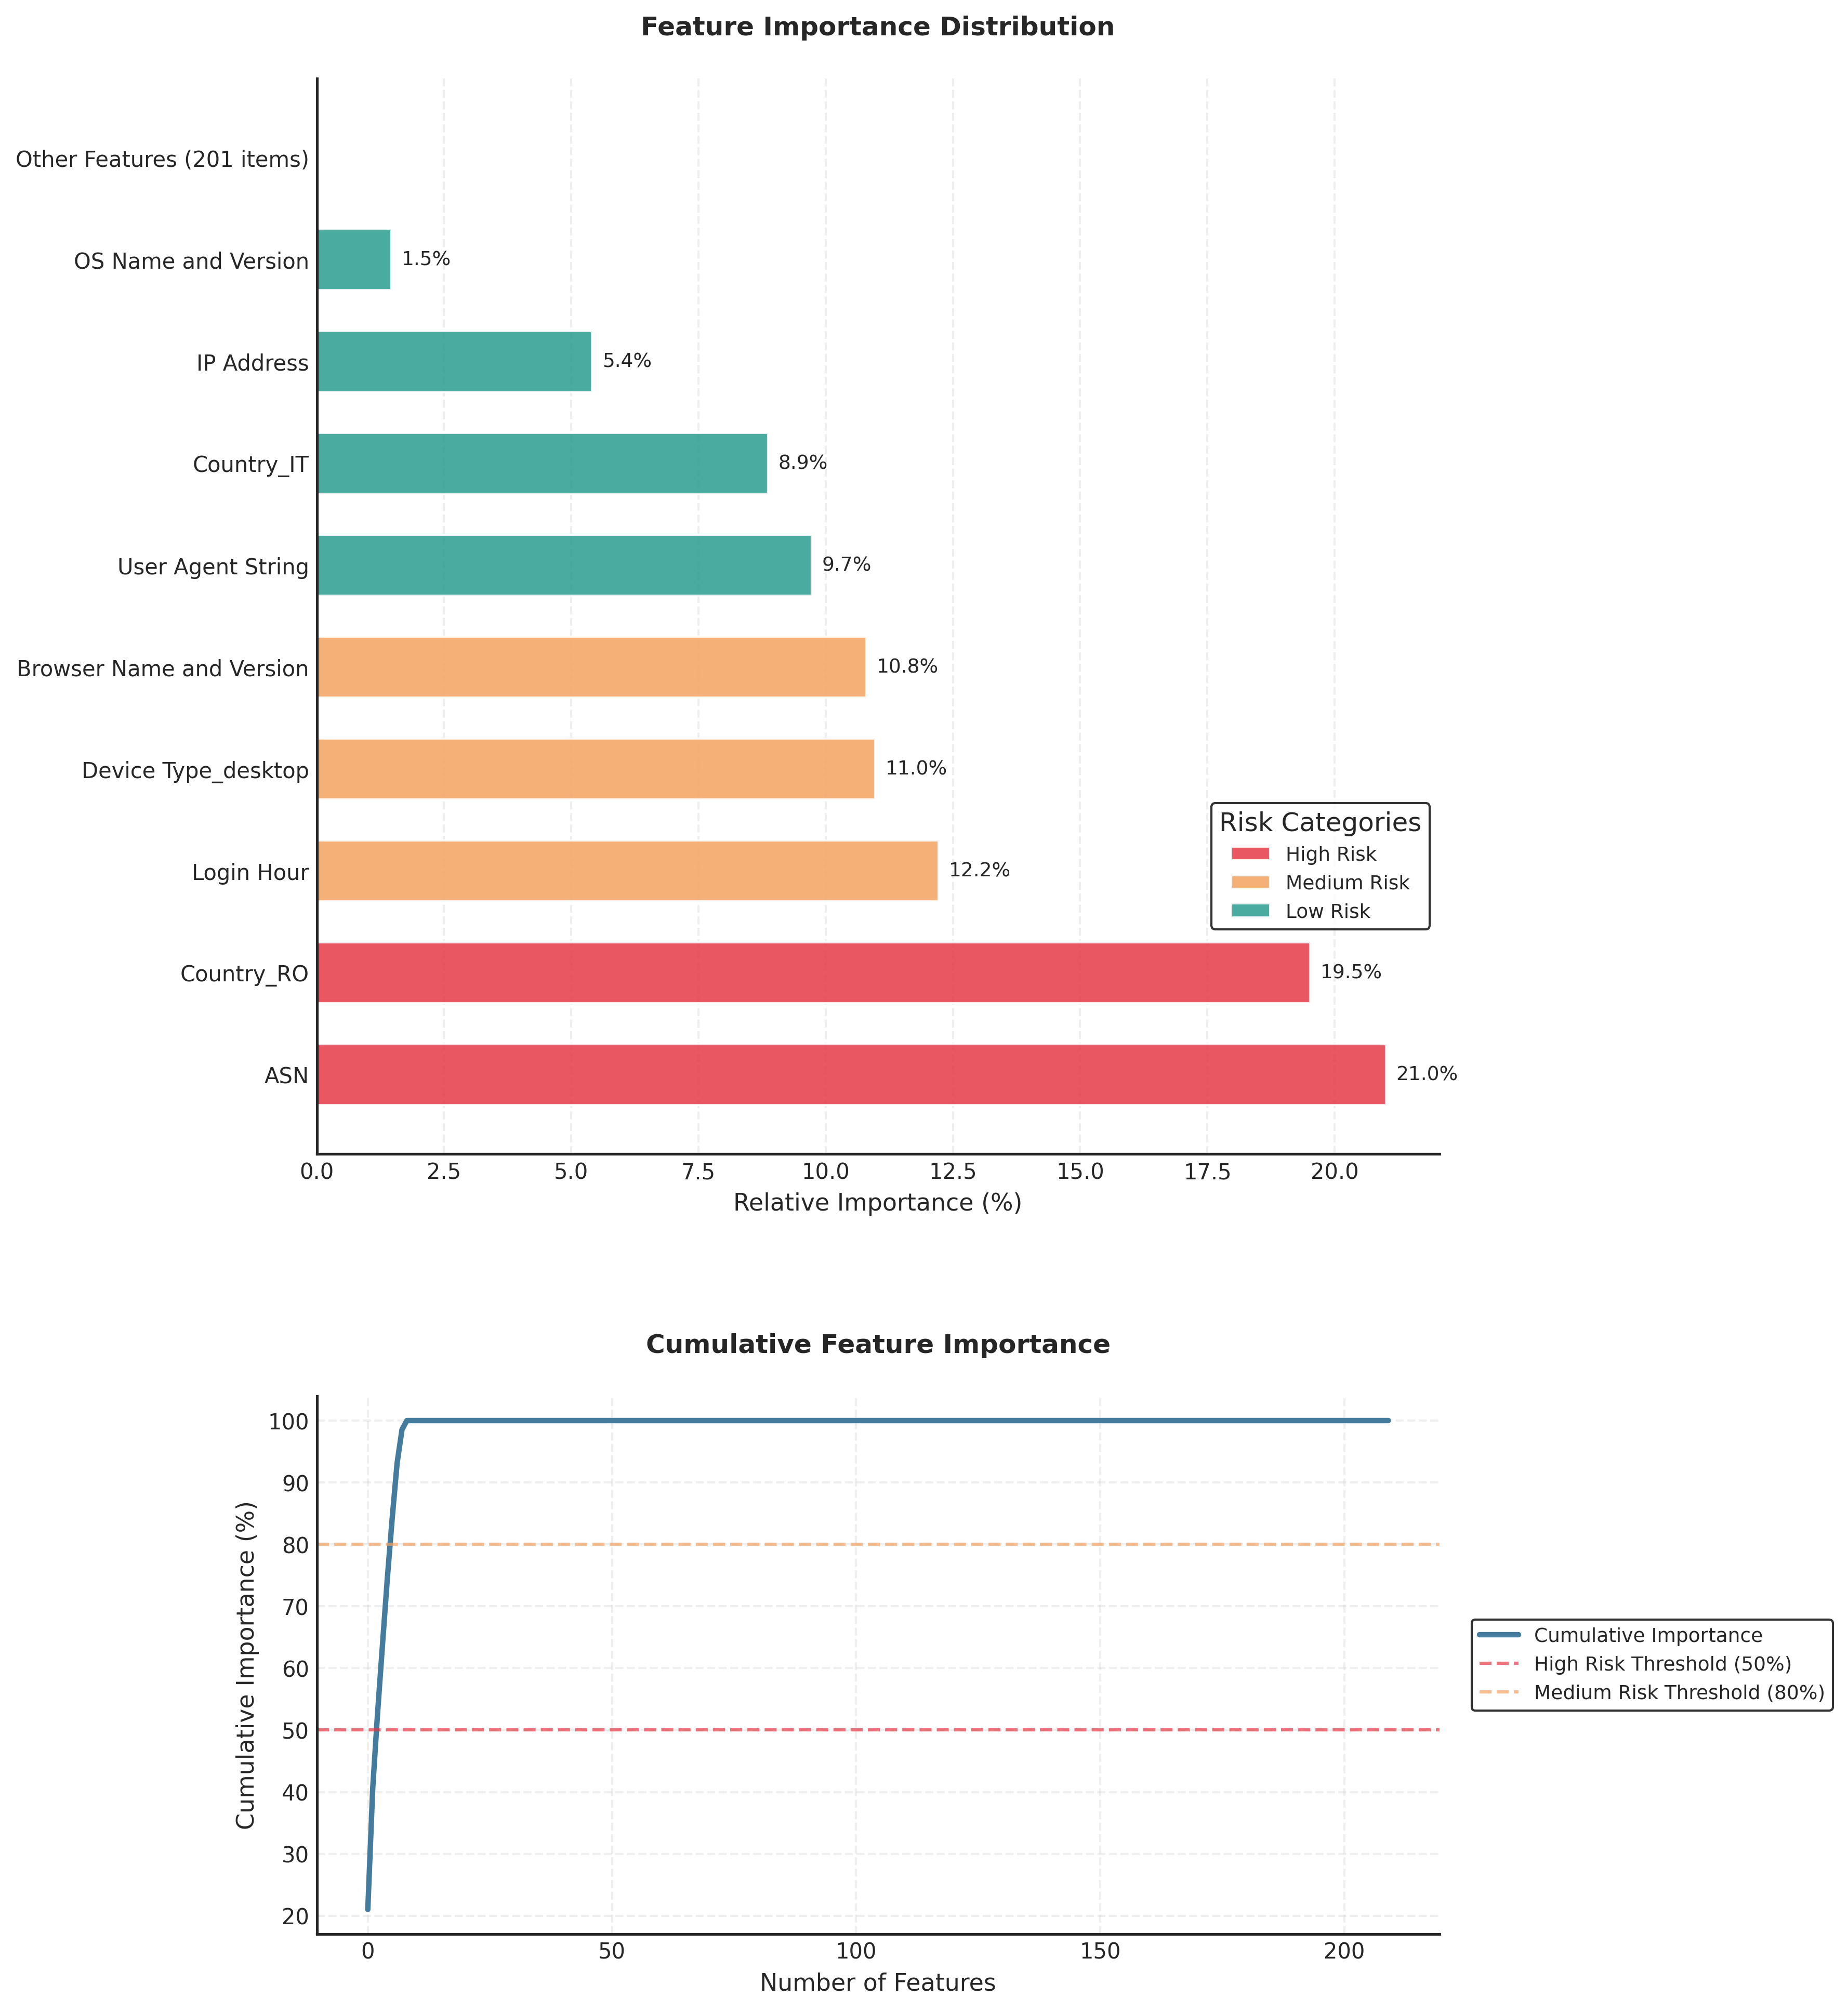

In [54]:
def plot_feature_importance_improved(importance_df, top_n=20):
    """
    Create a publication-quality visualization for feature importance with
    fixed layout issues and improved readability
    """
    # Set style for publication-quality plots
    plt.style.use('seaborn-v0_8-white')

    # Set font properties
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.labelsize'] = 11
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10

    # Process the data
    zero_features = importance_df[importance_df['Importance_Normalized'] == 0]
    non_zero_features = importance_df[importance_df['Importance_Normalized'] > 0]

    # Take top N non-zero features
    top_features = non_zero_features.head(top_n-1)

    # Create a new row for zero features
    if len(zero_features) > 0:
        zero_row = pd.DataFrame({
            'Feature': [f'Other Features ({len(zero_features)} items)'],
            'Importance_Normalized': [0],
            'Cumulative_Importance': [top_features['Cumulative_Importance'].iloc[-1]
                                    if len(top_features) > 0 else 0],
            'Risk_Category': ['Low']
        })
        plot_df = pd.concat([top_features, zero_row])
    else:
        plot_df = top_features

    # Create figure with custom size and DPI
    fig = plt.figure(figsize=(12, 14), dpi=300)

    # Create subplot grid with specific height ratios
    gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0.3)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    # Professional color scheme
    colors = {
        'High': '#E63946',    # Rich red
        'Medium': '#F4A261',  # Warm orange
        'Low': '#2A9D8F',     # Teal green
        'line': '#457B9D'     # Steel blue
    }

    # Plot 1: Horizontal bar plot
    bar_colors = [colors[cat] for cat in plot_df['Risk_Category']]
    y_pos = np.arange(len(plot_df))

    # Create bars with enhanced styling
    bars = ax1.barh(y_pos, plot_df['Importance_Normalized'],
                    color=bar_colors, height=0.6, alpha=0.85)

    # Customize bar plot
    ax1.set_yticks(y_pos)
    # Increase left margin for feature names and ensure they don't get cut off
    ax1.set_yticklabels(plot_df['Feature'], fontsize=10)

    # Add percentage labels only (no risk categories)
    for i, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:
            # Percentage label
            ax1.text(width + 0.2, bar.get_y() + bar.get_height()/2,
                    f'{width:.1f}%',
                    va='center', fontsize=9)

    # Create legend for risk categories
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=colors['High'], label='High Risk', alpha=0.85),
        Patch(facecolor=colors['Medium'], label='Medium Risk', alpha=0.85),
        Patch(facecolor=colors['Low'], label='Low Risk', alpha=0.85)
    ]
       # Add legend to first plot with better positioning
    ax1.legend(handles=legend_elements,
              title='Risk Categories',
              loc='lower right',
              bbox_to_anchor=(1, 0.2),
              frameon=True,
              edgecolor='black',
              fontsize=9)

    # Customize first plot appearance
    ax1.grid(True, axis='x', alpha=0.3, linestyle='--')
    ax1.set_axisbelow(True)

    # Remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Add titles with enhanced styling
    ax1.set_title('Feature Importance Distribution',
                  pad=20, fontsize=12, fontweight='bold')
    ax1.set_xlabel('Relative Importance (%)', fontsize=11)
      # Plot 2: Cumulative importance
    x_range = range(len(importance_df))
    line = ax2.plot(x_range, importance_df['Cumulative_Importance'],
                   color=colors['line'], linewidth=2.5,
                   label='Cumulative Importance')

    # Add threshold lines with styled appearance
    high_line = ax2.axhline(y=50, color=colors['High'], linestyle='--',
                           alpha=0.7, linewidth=1.5,
                           label='High Risk Threshold (50%)')
    med_line = ax2.axhline(y=80, color=colors['Medium'], linestyle='--',
                          alpha=0.7, linewidth=1.5,
                          label='Medium Risk Threshold (80%)')

    # Customize cumulative plot
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    # Add titles and labels
    ax2.set_title('Cumulative Feature Importance',
                  pad=20, fontsize=12, fontweight='bold')
    ax2.set_xlabel('Number of Features', fontsize=11)
    ax2.set_ylabel('Cumulative Importance (%)', fontsize=11)

    # Add legend for second plot with better positioning
    ax2.legend(loc='center left',
              bbox_to_anchor=(1.02, 0.5),
              fontsize=9,
              frameon=True,
              edgecolor='black')

    # Fine-tune layout with more space for labels and legends
    plt.subplots_adjust(left=0.25, right=0.85, bottom=0.1, top=0.95)

    return fig

# Example usage:
try:
    # Sort the DataFrame by importance
    importance_df = importance_df.sort_values('Importance_Normalized', ascending=False)

    # Create and display the improved visualization
    fig = plot_feature_importance_improved(importance_df)

    # Save with high quality
    plt.savefig('feature_importance.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

except Exception as e:
    import traceback
    print(f"Error: {str(e)}")
    print("\nFull traceback:")
    print(traceback.format_exc())
